## Kuis 1

Amalia Salsa Lutfiana
3F/04/2141720228

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

**No. 1**

Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

In [1]:
# Mengunduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# Membaca deskripsi dataset
print(mnist.DESCR)

# Melakukan inspeksi semua key dalam dataset
mnist.keys()

c:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

c:\Users\Hp\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


Label Angka  Jumlah Data
     0          6903
     1          7877
     2          6990
     3          7141
     4          6824
     5          6313
     6          6876
     7          7293
     8          6825
     9          6958


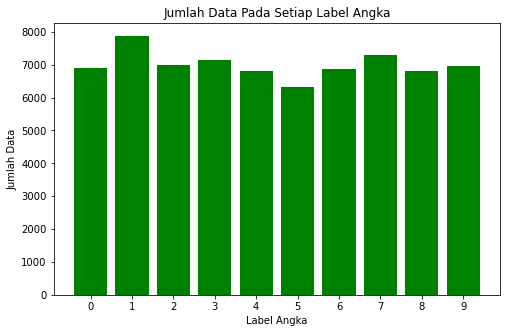

In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Mengonversi data MNIST ke dalam bentuk DataFrame
df = pd.DataFrame(data=mnist.data, columns=[f'pixel_{i}' for i in range(784)])

# Menambahkan kolom target sebagai label
df['target'] = mnist.target.astype(int) 

# Menghitung jumlah data pada setiap label
label_counts = df['target'].value_counts().sort_index()

# Menampilkan hasil perhitungan
print("Label Angka  Jumlah Data")
for label, count in label_counts.iteritems():
    print(f"     {label}          {count}")

# Memvisualisasi grafik batang
plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values, color='green')
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data Pada Setiap Label Angka')
plt.xticks(label_counts.index)
plt.show()


Dari hasil perhitungan di atas, tampak jumlah data untuk setiap label angka 0-9 yang relatif sama atau hampir serupa, sehingga dataset dianggap seimbang.

**No. 2**

Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

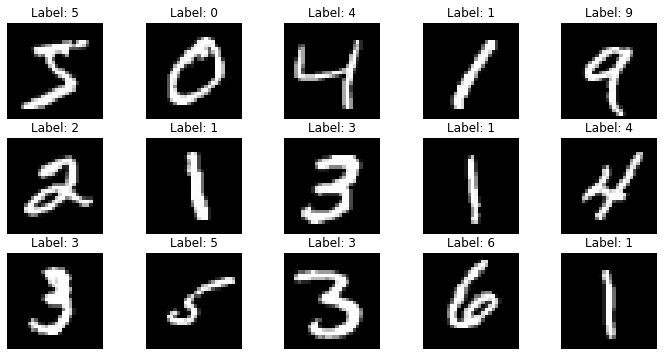

In [3]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Memisahkan data fitur (X) dan target (y)
X = mnist.data
y = mnist.target.astype(int)

# Menampilkan citra
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.show()

**No 3**

Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan normalisasi nilai piksel
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

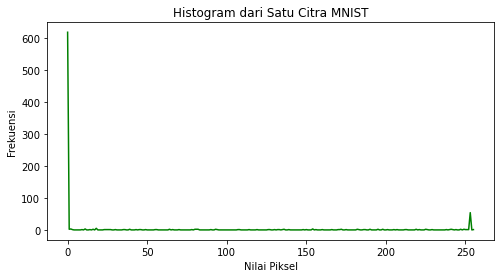

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengambil citra pertama
sample_image = X.iloc[0].values.reshape(28, 28)

# Menghitung histogram citra
def compute_histogram(image):
    # Menghitung histogram citra
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    return hist

# Menghitung histogram dari contoh citra
sample_histogram = compute_histogram(sample_image)

# Menampilkan histogram dari contoh citra
plt.figure(figsize=(8, 4))
plt.plot(sample_histogram, color='green')
plt.title("Histogram dari Satu Citra MNIST")
plt.xlabel("Nilai Piksel")
plt.ylabel("Frekuensi")
plt.show()


**No 4**

Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = mnist.data
y = mnist.target

# Membagi dataset menjadi data latih dan data uji
# 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran pada tiap data
print("1. Rasio 70:30")
print("   Data Training:", X_train_70.shape, y_train_70.shape)
print("   Data Testing:", X_test_70.shape, y_test_70.shape)
print("")

# Membagi dataset menjadi data latih dan data uji
# 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)
print("2. Rasio 80:20")
print("   Data Training:", X_train_80.shape, y_train_80.shape)
print("   Data Testing:", X_test_80.shape, y_test_80.shape)
print("")

# Membagi dataset menjadi data latih dan data uji
# 90:10
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)
print("3. Rasio 90:10")
print("   Data Training:", X_train_90.shape, y_train_90.shape)
print("   Data Testing:", X_test_90.shape, y_test_90.shape)
print("")

1. Rasio 70:30
   Data Training: (49000, 784) (49000,)
   Data Testing: (21000, 784) (21000,)

2. Rasio 80:20
   Data Training: (56000, 784) (56000,)
   Data Testing: (14000, 784) (14000,)

3. Rasio 90:10
   Data Training: (63000, 784) (63000,)
   Data Testing: (7000, 784) (7000,)



**No. 5**

Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

In [7]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
# Tunning Paramater
def train_model(model,param_grid,X,y):
  grid = GridSearchCV(model, param_grid,n_jobs=-1)
  %time grid.fit(X,y)
  print(grid.best_params_)
  print(grid.best_score_)

  model = grid.best_estimator_
  return model

In [8]:
# Visualisasi hasil prediksi model
def show_prediction(X,y,pred):

  # Inisialisasi label yang benar (ground truth) dan label prediksi
  true_labels = y
  predicted_labels = pred

  # Menampilkan citra dari data testing dengan label benar dan label prediksi
  plt.figure(figsize=(12, 6))
  for i in range(30):
      plt.subplot(6, 5, i + 1)
      plt.imshow(X[i].reshape(28, 28), cmap="gray")

      # Tentukan warna teks berdasarkan benar atau salah
      if true_labels[i] == predicted_labels[i]:
          text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
      else:
          text_color = 'red'  # Jika prediksi salah, teks berwarna merah

      plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
      plt.axis("off")
  plt.tight_layout()
  plt.show()

In [9]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
# Membuat model SVM
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Klasifikasi menggunakan Gaussian Naive Bayes 70:30
gnb = GaussianNB()
gnb.fit(X_train_70, y_train_70)
y_pred_70_gaussian = gnb.predict(X_test_70)
accuracy_70_gaussian = accuracy_score(y_test_70, y_pred_70_gaussian)
print("Akurasi Naive Bayes (70:30):", accuracy_70_gaussian)

# Klasifikasi menggunakan Gaussian Naive Bayes 80:20
gnb = GaussianNB()
gnb.fit(X_train_80, y_train_80)
y_pred_80_gaussian = gnb.predict(X_test_80)  # Perhatikan penggunaan X_test_80
accuracy_80_gaussian = accuracy_score(y_test_80, y_pred_80_gaussian)
print("Akurasi Naive Bayes (80:20):", accuracy_80_gaussian)

# Klasifikasi menggunakan Gaussian Naive Bayes 90:10
gnb = GaussianNB()
gnb.fit(X_train_90, y_train_90)
y_pred_90_gaussian = gnb.predict(X_test_90)  # Perhatikan penggunaan X_test_90
accuracy_90_gaussian = accuracy_score(y_test_90, y_pred_90_gaussian)
print("Akurasi Naive Bayes (90:10):", accuracy_90_gaussian)


Akurasi Naive Bayes (70:30): 0.550952380952381
Akurasi Naive Bayes (80:20): 0.5515714285714286
Akurasi Naive Bayes (90:10): 0.5634285714285714


In [11]:
# Klasifikasi menggunakan SVM 70:30
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_70)
X_test_1 = scaler.transform(X_test_70)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_1, y_train_70)

y_pred = svm_classifier.predict(X_test_1)
accuracy = accuracy_score(y_test_70, y_pred)
report = classification_report(y_test_70, y_pred)
print(f'Akurasi SVM (70:30) : {accuracy}')


# Klasifikasi menggunakan SVM 80:20
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_80)
X_test_2 = scaler.transform(X_test_80)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_2, y_train_80)

y_pred = svm_classifier.predict(X_test_2)
accuracy = accuracy_score(y_test_80, y_pred)
report = classification_report(y_test_80, y_pred)
print(f'Akurasi SVM (80:20) : {accuracy}')


# Klasifikasi menggunakan SVM 90:10
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_3 = scaler.fit_transform(X_train_90)
X_test_3 = scaler.transform(X_test_90)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_3, y_train_90)

y_pred = svm_classifier.predict(X_test_3)
accuracy = accuracy_score(y_test_90, y_pred)
report = classification_report(y_test_90, y_pred)
print(f'Akurasi SVM (90:10) : {accuracy}')

Akurasi SVM (70:30) : 0.92
Akurasi SVM (80:20) : 0.9210714285714285
Akurasi SVM (90:10) : 0.923


**No 6**

Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

70:30

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Membuat dan melatih model Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_70, y_train_70)

# Melakukan prediksi label untuk data training dan data testing
y_train_pred = mnb.predict(X_train_70)
y_test_pred = mnb.predict(X_test_70)

# Melakukan evaluasi akurasi data training
train_accuracy = accuracy_score(y_train_70, y_train_pred)
print("Akurasi Data Training:", train_accuracy)

# Melakukan evaluasi akurasi data testing
test_accuracy = accuracy_score(y_test_70, y_test_pred)
print("Akurasi Data Testing:", test_accuracy)

# Classification Report untuk data training
class_report = classification_report(y_test_70, y_test_pred)
print("Classification Report untuk Data Training:")
print(class_report)

# Confusion Matrix untuk data Testing
conf_matrix = confusion_matrix(y_test_70, y_test_pred)
print("Confusion Matrix untuk Data Testing:")
print(conf_matrix)


Akurasi Data Training: 0.8278979591836735
Akurasi Data Testing: 0.8257142857142857
Classification Report untuk Data Training:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2058
           1       0.88      0.94      0.91      2364
           2       0.88      0.83      0.85      2133
           3       0.79      0.81      0.80      2176
           4       0.83      0.74      0.78      1936
           5       0.85      0.66      0.75      1915
           6       0.87      0.92      0.89      2088
           7       0.94      0.83      0.88      2248
           8       0.65      0.77      0.70      1992
           9       0.69      0.83      0.76      2090

    accuracy                           0.83     21000
   macro avg       0.83      0.82      0.82     21000
weighted avg       0.83      0.83      0.83     21000

Confusion Matrix untuk Data Testing:
[[1857    1   12    6    4   33   40    1  102    2]
 [   0 2215   12   22    

80:20

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Membuat dan melatih model Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_80, y_train_80)

# Melakukan prediksi label untuk data training dan data testing
y_train_pred = mnb.predict(X_train_80)
y_test_pred = mnb.predict(X_test_80)

# Melakukan evaluasi akurasi data training
train_accuracy = accuracy_score(y_train_80, y_train_pred)
print("Akurasi Data Training:", train_accuracy)

# Melakukan evaluasi akurasi data testing
test_accuracy = accuracy_score(y_test_80, y_test_pred)
print("Akurasi Data Testing:", test_accuracy)

# Classification Report untuk data training
class_report = classification_report(y_test_80, y_test_pred)
print("Classification Report untuk Data Training:")
print(class_report)

# Confusion Matrix untuk data Testing
conf_matrix = confusion_matrix(y_test_80, y_test_pred)
print("Confusion Matrix untuk Data Testing:")
print(conf_matrix)


Akurasi Data Training: 0.8266785714285714
Akurasi Data Testing: 0.829
Classification Report untuk Data Training:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1343
           1       0.88      0.94      0.90      1600
           2       0.88      0.83      0.85      1380
           3       0.80      0.82      0.81      1433
           4       0.84      0.74      0.78      1295
           5       0.86      0.67      0.75      1273
           6       0.88      0.91      0.90      1396
           7       0.94      0.83      0.88      1503
           8       0.67      0.78      0.72      1357
           9       0.70      0.84      0.76      1420

    accuracy                           0.83     14000
   macro avg       0.84      0.83      0.83     14000
weighted avg       0.84      0.83      0.83     14000

Confusion Matrix untuk Data Testing:
[[1215    1    8    4    2   21   29    1   60    2]
 [   0 1498    6   13    1   10    5  

90:10

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Membuat dan melatih model Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_90, y_train_90)

# Melakukan prediksi label untuk data training dan data testing
y_train_pred = mnb.predict(X_train_90)
y_test_pred = mnb.predict(X_test_90)

# Melakukan evaluasi akurasi data training
train_accuracy = accuracy_score(y_train_90, y_train_pred)
print("Akurasi Data Training:", train_accuracy)

# Melakukan evaluasi akurasi data testing
test_accuracy = accuracy_score(y_test_90, y_test_pred)
print("Akurasi Data Testing:", test_accuracy)

# Classification Report untuk data training
class_report = classification_report(y_test_90, y_test_pred)
print("Classification Report untuk Data Training:")
print(class_report)

# Confusion Matrix untuk data Testing
conf_matrix = confusion_matrix(y_test_90, y_test_pred)
print("Confusion Matrix untuk Data Testing:")
print(conf_matrix)


Akurasi Data Training: 0.8268412698412698
Akurasi Data Testing: 0.8294285714285714
Classification Report untuk Data Training:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       683
           1       0.86      0.94      0.90       800
           2       0.87      0.82      0.85       674
           3       0.79      0.82      0.81       760
           4       0.83      0.74      0.79       611
           5       0.88      0.69      0.77       658
           6       0.86      0.91      0.89       677
           7       0.95      0.82      0.88       724
           8       0.67      0.76      0.71       693
           9       0.72      0.85      0.78       720

    accuracy                           0.83      7000
   macro avg       0.84      0.83      0.83      7000
weighted avg       0.84      0.83      0.83      7000

Confusion Matrix untuk Data Testing:
[[622   0   4   2   0  11  14   0  29   1]
 [  0 751   3   7   0   3   5   0  

**No 7**

Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

Akurasi Gaussian Naive Bayes: 0.550952380952381


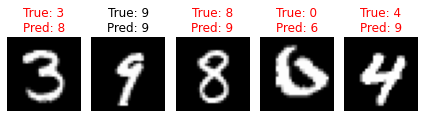

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Mengambil dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Memisahkan fitur (X) dan target (y)
X = mnist.data
y = mnist.target

# Membagi dataset menjadi data latih dan data uji (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Ubah test_size menjadi 0.3

# Melakukan normalisasi nilai piksel
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Contoh dengan Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Gaussian Naive Bayes:", accuracy)

# Menampilkan citra data testing beserta hasil prediksi Gaussian Naive Bayes
def show_images_with_predictions(images, true_labels, predicted_labels, num_images=5):
    sample_indices = np.random.choice(range(len(images)), num_images)

    for i, sample_index in enumerate(sample_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[sample_index].reshape((28, 28)), cmap='gray')
        plt.title(f'True: {true_labels[sample_index]}\nPred: {predicted_labels[sample_index]}')

        text_color = 'black' if true_labels[sample_index] == predicted_labels[sample_index] else 'red'
        plt.title(f"True: {true_labels[sample_index]}\nPred: {predicted_labels[sample_index]}", color=text_color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Menampilkan citra data testing beserta hasil prediksi Gaussian Naive Bayes
show_images_with_predictions(X_test, y_test, y_pred, num_images=5)


Akurasi Gaussian Naive Bayes: 0.5515714285714286


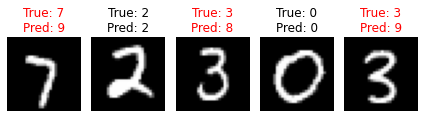

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Mengambil dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Memisahkan fitur (X) dan target (y)
X = mnist.data
y = mnist.target

# Membagi dataset menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan normalisasi nilai piksel
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Contoh dengan Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Gaussian Naive Bayes:", accuracy)

# Menampilkan citra data testing beserta hasil prediksi Gaussian Naive Bayes
def show_images_with_predictions(images, true_labels, predicted_labels, num_images=5):
    sample_indices = np.random.choice(range(len(images)), num_images)

    for i, sample_index in enumerate(sample_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[sample_index].reshape((28, 28)), cmap='gray')
        plt.title(f'True: {true_labels[sample_index]}\nPred: {predicted_labels[sample_index]}')

        text_color = 'black' if true_labels[sample_index] == predicted_labels[sample_index] else 'red'
        plt.title(f"True: {true_labels[sample_index]}\nPred: {predicted_labels[sample_index]}", color=text_color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Menampilkan citra data testing beserta hasil prediksi Gaussian Naive Bayes
show_images_with_predictions(X_test, y_test, y_pred, num_images=5)


Akurasi Gaussian Naive Bayes: 0.5634285714285714


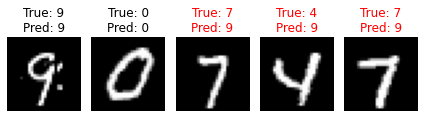

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Mengambil dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Memisahkan fitur (X) dan target (y)
X = mnist.data
y = mnist.target

# Membagi dataset menjadi data latih dan data uji (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Melakukan normalisasi nilai piksel
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Contoh dengan Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Gaussian Naive Bayes:", accuracy)

# Menampilkan citra data testing beserta hasil prediksi Gaussian Naive Bayes
def show_images_with_predictions(images, true_labels, predicted_labels, num_images=5):
    sample_indices = np.random.choice(range(len(images)), num_images)

    for i, sample_index in enumerate(sample_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[sample_index].reshape((28, 28)), cmap='gray')
        plt.title(f'True: {true_labels[sample_index]}\nPred: {predicted_labels[sample_index]}')

        text_color = 'black' if true_labels[sample_index] == predicted_labels[sample_index] else 'red'
        plt.title(f"True: {true_labels[sample_index]}\nPred: {predicted_labels[sample_index]}", color=text_color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Menampilkan citra data testing beserta hasil prediksi Gaussian Naive Bayes
show_images_with_predictions(X_test, y_test, y_pred, num_images=5)


**No 8**

Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

Dari hasil diatas diperoleh model terbaik adalah SVM dengan :

Akurasi SVM (70:30) : 0.92
Akurasi SVM (80:20) : 0.9210714285714285
Akurasi SVM (90:10) : 0.923

Parameter:

● Parameter c untuk SVM diatur ke 5, parameter gamma diatur ke 0.05

Tingkat Akurasi:

● Rasio 70:30 : Akurasi 98.54%

● Rasio 80:20 : Akurasi 98.58%

● Rasio 90:10 : Akurasi 98.64%